In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install statsmodels
print(plt.style.available)
import seaborn as sns; sns.set()

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


##Set up the parameters:

In [ ]:
semana = 52

### Introduction
------------------

The following analysis compares the risk adjusted portfolio return of a diversified portfolio with exposure to Emerging Markets debt versus a diversified Portfolio with no exposure to EM debt.

#### Research Objectives:

* Compare the marginal risk adjusted return contribution provided by the addition of EM Debt to a portfolio.
* To create a basic framework to analyze and compare portfolios with N assets
* To create useful visualizations and simulations

### Portfolio components & key statistics 
--------------------------

#### Dataset:

Source: Yahoo Finance

Assets:
1. SPY : [SPDR S&P 500 ETF](https://us.spdrs.com/en/etf/spdr-sp-500-etf-SPY)
2. QQQ : [PowerShares QQQ ETF](https://www.invesco.com/portal/site/us/investors/etfs/product-detail?productId=QQQ)
3. AGG : [iShares Core US Aggregate Bond ETF](https://www.ishares.com/us/products/239458/ishares-core-total-us-bond-market-etf)
4. GLD : [SPDR Gold Shares](https://us.spdrs.com/en/etf/spdr-gold-shares-GLD)
5. EMB : [iShares JP Morgan USD Em Mkts Bd ETF](https://www.ishares.com/us/products/239572/ishares-jp-morgan-usd-emerging-markets-bond-etf)
    
Period: 
* Start: 4/29/2013
* End: 4/30/2018
* Periodicity: Weekly
* Data points: 262

In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/Tugas Asset Allocation /MasterAllocation.xlsx',sheet_name='Summary',index_col='Date')
datos

,AGG,SPY,QQQ,EMB,GLD
Date,,,,,
2013-04-29,98.953514,146.038452,68.166382,96.207443,142.089996
2013-05-06,98.677559,147.884644,69.045410,95.834373,139.600006
2013-05-13,98.525726,151.079254,70.226891,95.102715,131.070007
2013-05-20,98.141640,149.604111,69.385689,93.687080,133.759995
2013-05-27,97.453911,147.920853,69.234444,91.484062,133.919998
...,...,...,...,...,...
2018-04-02,106.426262,259.720001,156.630005,111.778152,126.389999
2018-04-09,106.558189,265.149994,161.369995,111.990532,127.449997
2018-04-16,105.760002,266.609985,162.300003,110.735229,126.629997


### Historical evolution
-------------------------------------------------------------

Visualize data is an important step to develop an initial intuition.

Let us plot the full price action for the observation period.

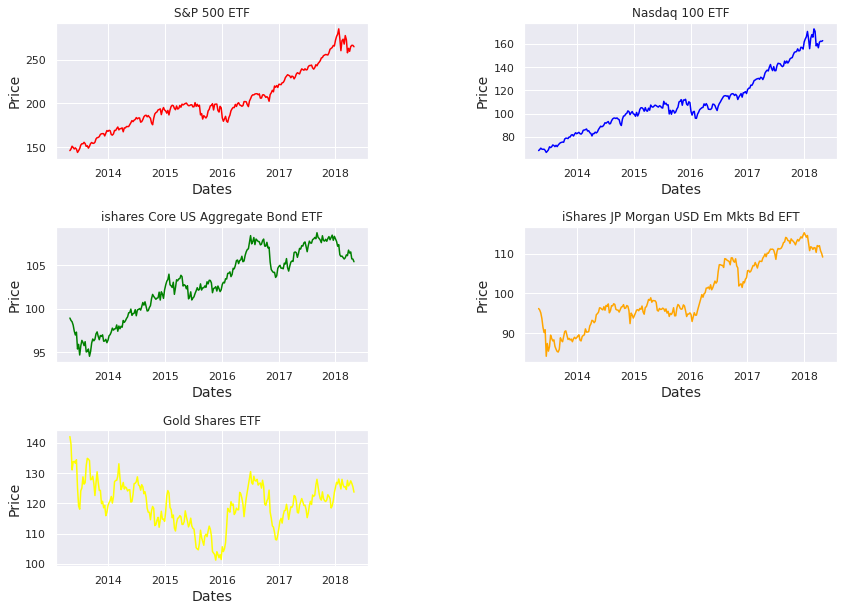

In [ ]:
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()
ax.plot(datos['AGG'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('ishares Core US Aggregate Bond ETF')

plt.subplot(321)
ax = plt.gca()
ax.plot(datos['SPY'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('S&P 500 ETF')

plt.subplot(322)
ax = plt.gca()
ax.plot(datos['QQQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Nasdaq 100 ETF')

plt.subplot(324)
ax = plt.gca()
ax.plot(datos['EMB'], color='orange')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('iShares JP Morgan USD Em Mkts Bd EFT')

plt.subplot(325)
ax = plt.gca()
ax.plot(datos['GLD'], color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('Gold Shares ETF')

plt.show();
fig1.savefig('prices.png',dpi=fig1.dpi)

### Relative performance by Asset Class
------------------------------

Each assets has a different initial value which makes difficult to compare the relative performance of each asset versus the rest of them.

Let us normalize the data to compare if you would have invested one dollar at the beginning of the observation period, how much money you would have today.

$\mbox{Normalized Prices} = \left[\frac {P_0}{P_0},\dotsb,\frac {P_N}{P_0}\right]$

In [ ]:
normalized_series = (datos/datos.iloc[0])

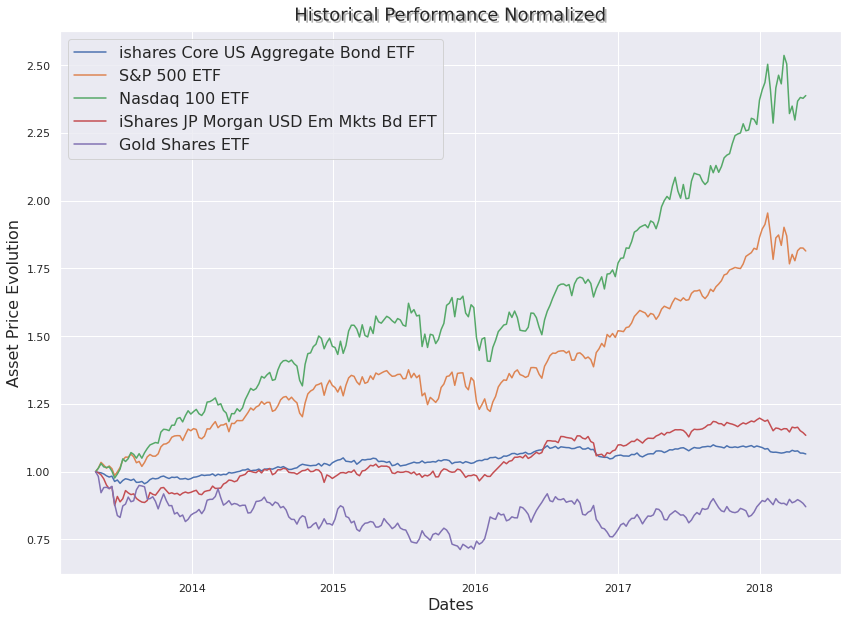

In [ ]:
from matplotlib import patheffects
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','EMB','GLD')
plt.legend(('ishares Core US Aggregate Bond ETF','S&P 500 ETF','Nasdaq 100 ETF','iShares JP Morgan USD Em Mkts Bd EFT','Gold Shares ETF'),fontsize = 16)
plt.show()
fig2.savefig('norm_prices.png',dpi=fig2.dpi);

### Descriptive Statistics
---------------------------------------

It is time to put some numbers to our analysis.

The first layer of analysis would include the following:

* Assets returns

  $ r_i =\ln\left( \frac{P_i}{P_{i-1}}\right) $

  $\mbox{Annualized Returns} = \left(\sum_{i=1}^{N} r_i \right) \times 52$ 
  

* Assets Volatility

  $\mbox{Annualized Volatility} = \sqrt {\frac{1}{N}\sum_{i=1}^{N}\left(x_i - \mu \right)} \times \sqrt{52} $

* Sharpe ratio: 

  $\mbox{Sharpe Ratio} = \frac{R_p}{\sigma_p}$

In [ ]:
datos_returns = np.log(datos/datos.shift(1))
datos_returns.dropna(inplace=True)

In [ ]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =datos_returns.mean() * semana *100
stats['Annualized Volatility(%)'] = datos_returns.std() * np.sqrt(semana)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']

In [ ]:
print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
AGG,1.263224,3.600300,0.350866
SPY,11.870035,11.677160,1.016517
QQQ,17.342261,14.721081,1.178056
EMB,2.509412,8.009469,0.313306
GLD,-2.759796,14.808920,-0.186360


### Dispersion of returns
---------------------

The second layer of analysis is driven by the third and fourth moment of the data, i.e. Skewness and Kurtosis.

As part of the portfolio risk management we need to understand if returns bend more frequently than a normal distribution towards positive or negative values (Skewness).
In the same manner It is critical to calculate if the assets tend to have extreme events rather positive or negative events (Fat tails), more frequently than normally distributed assets.

The charts below present the histogram of returns for each asset.

To facilitate te comparison a bell shaped normally distruted curve with mean and starndard deviation equal to the assets under consideration is drawn, Finally Skewness and Kurtosis values are included in the charts.

  $Skewness = E\left[\left(\frac{X -\mu}{\sigma}\right)^3\right]$
  
  $Kurtosis = E\left[\left(\frac{X -\mu}{\sigma}\right)^4\right]$

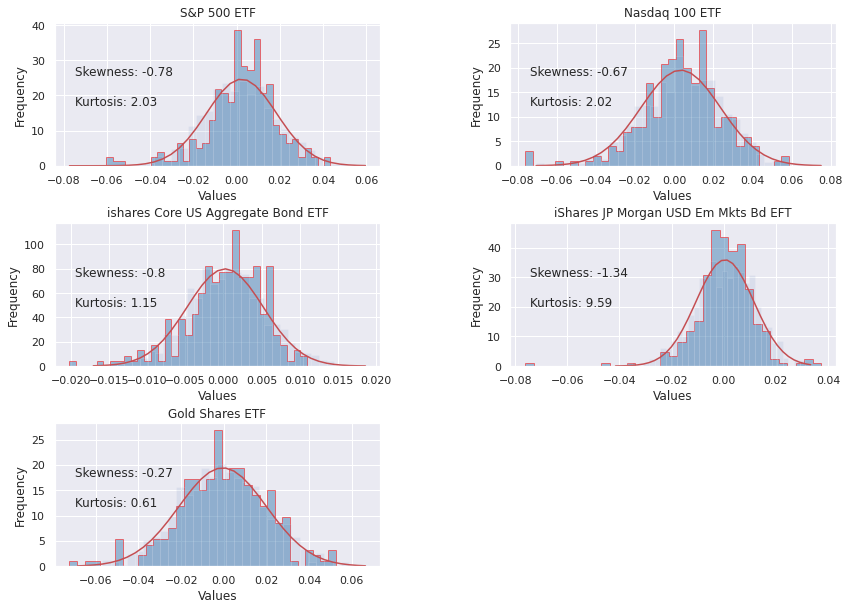

In [ ]:
binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()

ax.hist(datos_returns['AGG'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['AGG'].std(),datos_returns['AGG'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['AGG'].skew(),2),round(datos_returns['AGG'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('ishares Core US Aggregate Bond ETF')

plt.subplot(321)
ax1 = plt.gca()
ax1.hist(datos_returns['SPY'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['SPY'].std(),datos_returns['SPY'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['SPY'].skew(),2),round(datos_returns['SPY'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('S&P 500 ETF')

plt.subplot(322)
ax = plt.gca()
ax.hist(datos_returns['QQQ'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['QQQ'].std(),datos_returns['QQQ'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['QQQ'].skew(),2),round(datos_returns['QQQ'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Nasdaq 100 ETF')

plt.subplot(324)
ax = plt.gca()
ax.hist(datos_returns['EMB'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['EMB'].std(),datos_returns['EMB'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['EMB'].skew(),2),round(datos_returns['EMB'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('iShares JP Morgan USD Em Mkts Bd EFT')

plt.subplot(325)
ax = plt.gca()
ax.hist(datos_returns['GLD'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['GLD'].std(),datos_returns['GLD'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['GLD'].skew(),2),round(datos_returns['GLD'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Gold Shares ETF')

plt.show();
fig3.savefig('histos.png',dpi=fig3.dpi)

### U.S. Investment grade Bonds versus EM Government Bonds
--------------------------------

Let us compare the distribution of returns of the 2 Fixed Income assets in the portfolio

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


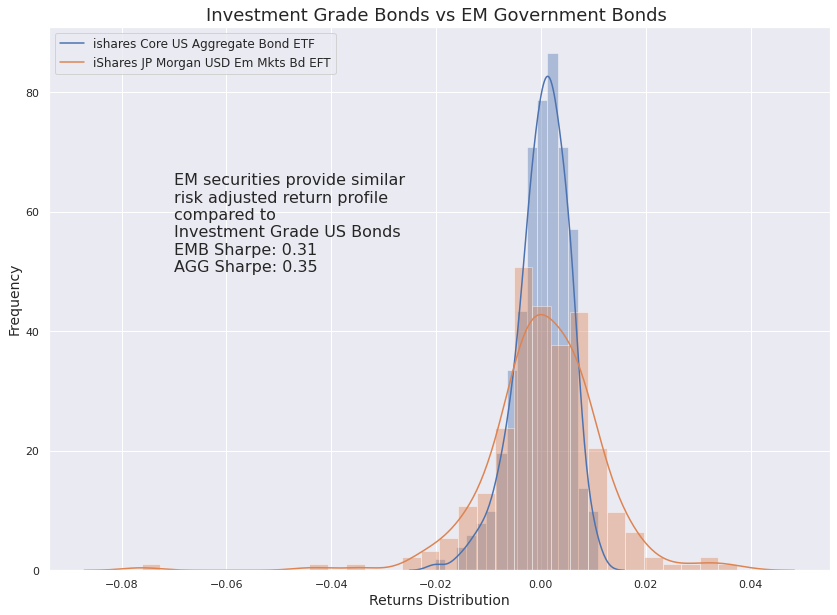

In [ ]:
fig4 = plt.figure(figsize=(14,10))
sns.distplot(datos_returns['AGG'])
sns.distplot(datos_returns['EMB'])
plt.legend(('ishares Core US Aggregate Bond ETF','iShares JP Morgan USD Em Mkts Bd EFT'),fontsize = 12)

# anotate an important value
plt.annotate('EM securities provide similar\nrisk adjusted return profile\ncompared to \nInvestment Grade US Bonds\nEMB Sharpe: {}\nAGG Sharpe: {}'.format(round(stats.loc['EMB','Sharpe Ratio'],2),round(stats.loc['AGG','Sharpe Ratio'],2)),
             xy=(-.01,40),xycoords = 'data',xytext =(-.07, 50),fontsize=16)
plt.title('Investment Grade Bonds vs EM Government Bonds ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

### Simulation
----------------

Initial Portfolio Allocation:

1. US Investment Grade Fixed Income: 30%
2. US Equities : 50% (S&P 500 index & Nasdaq 100 index)
3. Gold: 20% 

New Allocation including EM:

1. US Investment Grade Fixed Income: 30%
2. US Equities : 50% (S&P 500 index & Nasdaq 100 index)
3. EM Government Bonds: 20% 

In [ ]:
allocation = pd.DataFrame(data =[[.30,.30],[.35,.35],[.15,.15],[0,.20],[.20,0]],
                          index=['AGG','SPY','QQQ','EMB','GLD'],
                         columns =['No_EM','EM'])

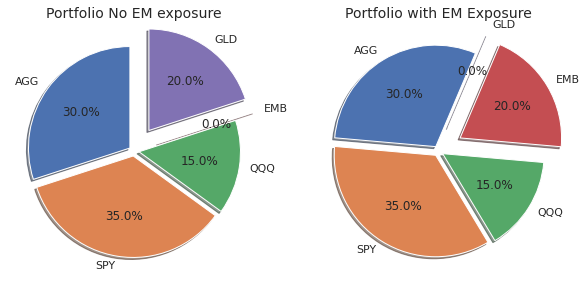

In [ ]:
fig5 =plt.figure(figsize=(10,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = [.05,.05,.05,.25,.25]

labels = ['AGG','SPY','QQQ','EMB','GLD']

plt.subplot(121)
plt.pie(allocation['No_EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 90,shadow=True)
plt.title('Portfolio No EM exposure',fontsize =14)

plt.subplot(122)
plt.pie(allocation['EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67, shadow= True)
plt.title('Portfolio with EM Exposure',fontsize =14)

plt.show();
fig5.savefig('pies.png',dpi=fig5.dpi)

### Portfolio Comparison
--------------------------------

Let us analyze the risk profile of each portfolio to compare performance

The risk profile of each portfolio is described by their volatility values

In [ ]:
datos_returns.corr('pearson')

,AGG,SPY,QQQ,EMB,GLD
AGG,1.000000,-0.111919,-0.063819,0.574893,0.418678
SPY,-0.111919,1.000000,0.905131,0.384069,-0.167545
QQQ,-0.063819,0.905131,1.000000,0.337579,-0.147379
EMB,0.574893,0.384069,0.337579,1.000000,0.244306
GLD,0.418678,-0.167545,-0.147379,0.244306,1.000000


Using the full period correlation matrix (Pearson formula) , let us calculate the annualized portfolio return and volatility.

In [ ]:
normalized_series1 = normalized_series.copy()

In [ ]:
normalized_series1['EM'] = normalized_series[['AGG','SPY','QQQ','EMB','GLD']].mul(allocation.EM.values,axis=1).sum(axis=1)
normalized_series1['no_EM'] = normalized_series.mul(allocation['No_EM'].values,axis=1).sum(axis=1)

In [ ]:
Expected_Return_noEM = np.sum(datos_returns.mean()* allocation.No_EM)* semana

In [ ]:
Expected_Std_noEM = np.sqrt(np.dot(allocation.No_EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.No_EM)))

In [ ]:
Sharpe_noEM = Expected_Return_noEM / Expected_Std_noEM

In [ ]:
Expected_Return_EM = np.sum(datos_returns.mean()* allocation.EM)* semana

In [ ]:
Expected_Std_EM = np.sqrt(np.dot(allocation.EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.EM)))

In [ ]:
Sharpe_EM = Expected_Return_EM / Expected_Std_EM

In [ ]:
print('Key Stats: Portfolio with no EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_noEM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_noEM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_noEM))
print(82*'-')
print('Key Stats: Portfolio with EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_EM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_EM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_EM))
print(82*'-')

Key Stats: Portfolio with no EM Securities 
Annualized Returns: 6.583%
Annualized Volatility: 6.577%
Sharpe Ratio: 1.001
----------------------------------------------------------------------------------
Key Stats: Portfolio with EM Securities 
Annualized Returns: 7.637%
Annualized Volatility: 7.054%
Sharpe Ratio: 1.083
----------------------------------------------------------------------------------


Following the same approach applied to visualize the dispersion of returns per asset class, let us observe how normally distributed or not are the returns of the 2 selected portfolios.

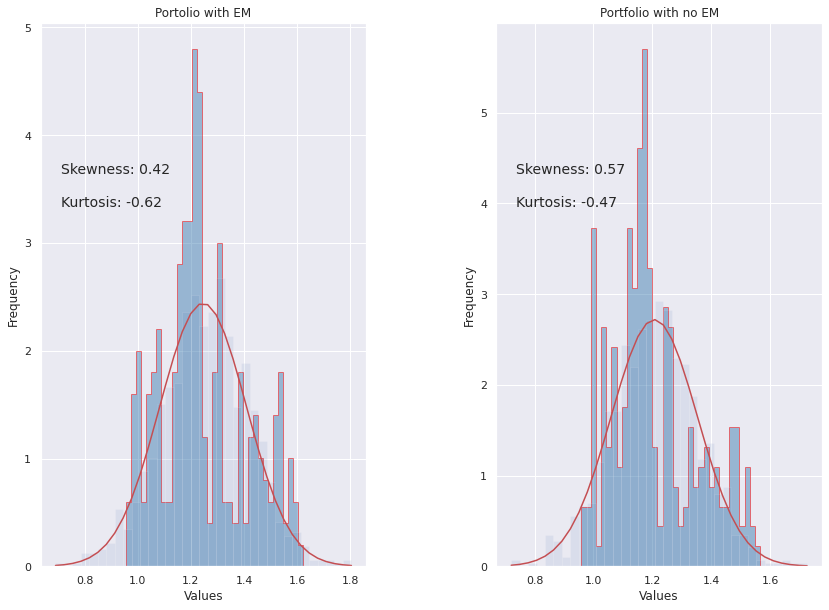

In [ ]:
binsnumber = 35

fig7, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(121)
ax = plt.gca()

ax.hist(normalized_series1['EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['EM'].std(),normalized_series1['EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['EM'].skew(),2),round(normalized_series1['EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Portolio with EM')

plt.subplot(122)
ax1 = plt.gca()
ax1.hist(normalized_series1['no_EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['no_EM'].std(),normalized_series1['no_EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['no_EM'].skew(),2),round(normalized_series1['no_EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Portfolio with no EM')
plt.show();
fig7.savefig('portfolioshistos.png',dpi=fig7.dpi)

### Monte Carlo Simulation:
--------------------------------

We are getting closer to the end so let us have some fun !!

Let us simulate a The Markowits efficient frontier as well as inefficiently diversified portfolio by running a random simulation over the weights of each asset in both portfolios

We are not only going to calculate the frontier portfolios but also internal (sub-optimal) portfolios.
To calculate each portfolio we are going to randomly alter the assets weights while keeping constant the asset classes of each portfolio.
The exercise will run 2,500 simulations for each portfolio.
Furthermore, the color scale is based on the Sharpe ratio of each portfolio, to visually separate the portfolios by their degree of risk adjusted efficiency.

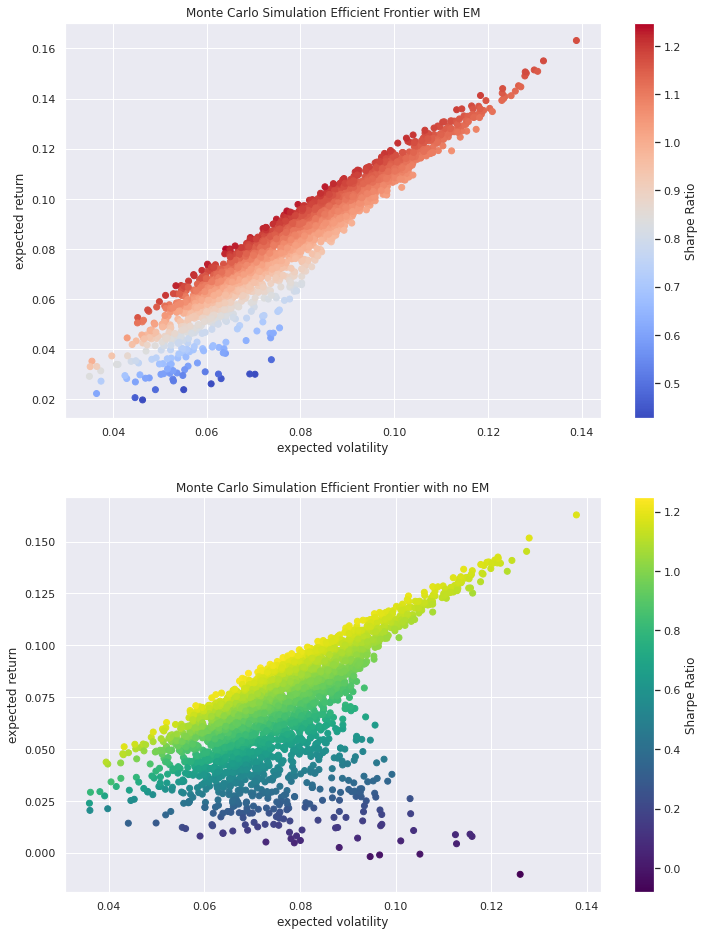

In [ ]:
pretsEM = []
pvolsEM = []

prets_noEM = []
pvols_noEM = []

[['AGG','SPY','QQQ','EMB']]
[['AGG','SPY','QQQ','GLD']]

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    pretsEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','EMB']].mean()* weights)* semana)
    pvolsEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','EMB']].cov()*semana,
                                                             weights))))
pretsEM = np.array(pretsEM)
pvolsEM = np.array(pvolsEM)

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    prets_noEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','GLD']].mean()* weights)* semana)
    pvols_noEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','GLD']].cov()*semana,
                                                             weights))))
prets_noEM = np.array(prets_noEM)
pvols_noEM = np.array(pvols_noEM)

# the charts

fig8 = plt.figure(figsize = (12,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(211)

plt.scatter(pvolsEM, pretsEM, c = pretsEM / pvolsEM, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')

plt.subplot(212)

plt.scatter(pvols_noEM, prets_noEM, c = prets_noEM / pvols_noEM, marker = 'o',cmap='viridis')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with no EM')

plt.show();
fig8.savefig('frontiers.png',dpi=fig8.dpi)

### Return & Volatility going beyond the surfice
--------------------------------------------------

We have used so far the returns and Correlation matrix for the whole period.

Using start to end calculations would naturally smooth the results by making the time series less volatile.

Let us calculate again return and volatility for the portfolio, but using 3 months trailing return and correlation.

You will notice that return and volatility mean revert around the historical average, hence, the overall conclusion would not chance if you would use a shorter timeframe to calculate, it would only increase the degree of stochasticity.

In [ ]:
def trailing_ret(retornos, window, weights, annualization = 52):
    
    roll_ret = retornos.rolling(window=window).mean()
    roll_ret = roll_ret.dropna()
    roll_ret = (roll_ret * weights)* annualization
    roll_ret = roll_ret.sum(axis =1)
    roll_ret = roll_ret.to_frame()
    roll_ret.rename(columns ={0:'returns'}, inplace = True)
    return roll_ret

In [ ]:
def trailing_cov2(retornos, window, weights, annualization = 52):
    retornos_length = len(retornos)
    retornos_width = len(retornos.columns)
    roll_cov = retornos.rolling(window=window).cov()
    roll_cov_dates = np.unique(roll_cov.index.get_level_values(0).values)
    roll_cov_dates = roll_cov_dates[window-1:]
    roll_cov = roll_cov.values.reshape(retornos_length,retornos_width,retornos_width)
    roll_cov = roll_cov[window-1:] * annualization
    weights = weights.values.reshape(len(weights),1)
    step1 = np.tensordot(roll_cov,weights,axes=[1,0])
    step2 = np.tensordot(weights,step1, axes=[0,1])
    volatility = np.sqrt(step2)
    volatility = volatility.reshape((retornos_length-(window-1)),1)
    
    trailing_vol = pd.DataFrame()
            
    trailing_vol['date'] = roll_cov_dates
    trailing_vol['volatility'] = volatility
    
    trailing_vol.set_index('date',inplace = True)
    
    return trailing_vol   

In [ ]:
def full_analysis(retornos, window, weights, annualization = 52):
    volatilidad = trailing_cov2(retornos = retornos, window = window, weights = weights, annualization = annualization)
    retornos = trailing_ret(retornos = retornos, window = window, weights = weights, annualization = annualization)
    fusion = pd.merge(volatilidad, retornos, left_index=True,right_index=True)
    fusion['sharpe'] = fusion['returns']/fusion['volatility']
    return fusion

In [ ]:
port_matrix = full_analysis(datos_returns,12,allocation.EM)

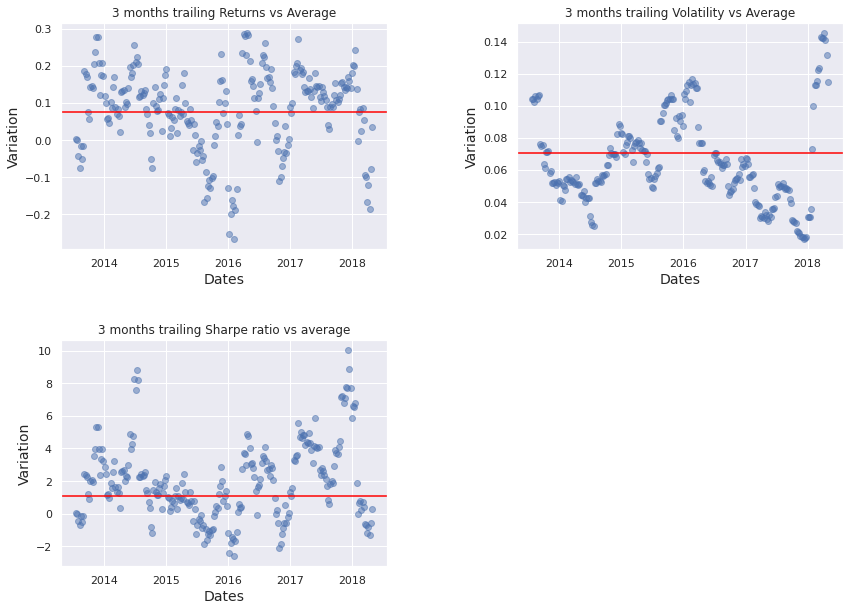

In [ ]:
fig9 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(222)
plt.plot(port_matrix.volatility, 'bo',alpha=0.5)
plt.axhline(Expected_Std_EM, color = 'red')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Volatility vs Average')

plt.subplot(221)
plt.plot(port_matrix.returns, 'bo',alpha = 0.5)
plt.axhline(Expected_Return_EM,color = 'red')

plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Returns vs Average')

plt.subplot(223)
plt.plot(port_matrix.sharpe, 'bo',alpha = 0.5)
plt.axhline(Sharpe_EM,color = 'red')


plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Sharpe ratio vs average')

plt.show();
fig9.savefig('trailings.png',dpi=fig9.dpi)

##Conclusions:

1. EM Bonds improves portfolio risk adjusted returns versus gold.
2. We have created a flexible model to compare assets whether individually or as a portfolio and visualize the risk and return implications while conducting strategic asset allocation.
3. The initial analysis indicates that the rolling time frame (full period versus 3-months) does not change strategic conclusions.
4. The framework serves as an initial base to keep expanding portfolio analysis, such as VAR calculation, Stress testing, etc. , leaving to the reader to leverage the existing model and to continue expanding this quantitative approach.